Here I will work on the basics of manipulating time series data. Time series data are data that are indexed by a sequence of dates or times. I will use Pandas to work with this index. I'll also work on how to resample time series to change the frequency. I will also show you how to calculate rolling and cumulative values for times series. Finally, I will also build a value-weighted stock index from actual stock data.


###### The first time series

I will create a sequence of dates using pd.date_range(). Each date in the resulting pd.DatetimeIndex will be a pd.Timestamp with various attributes that we can access to obtain information about the date.

I'll create a week of data, iterate over the result, and obtain the dayofweek and weekday_name for each date.

In [1]:
import pandas as pd

# Create the range of dates here
seven_days = pd.date_range(start='2017-1-1',periods=7)

# Iterate over the dates and print the number and name of the weekday
for day in seven_days:
 print(day.dayofweek, day.weekday_name)


6 Sunday
0 Monday
1 Tuesday
2 Wednesday
3 Thursday
4 Friday
5 Saturday


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: `weekday_name` is deprecated and will be removed in a future version. Use `day_name` instead
  


###### Create a time series of air quality data

Now I will work on how to deal with dates that are not in the correct format, but instead are provided as string types, represented as dtype object in pandas.

I will use a data set with air quality data (ozone, pm25, and carbon monoxide for NYC, 2000-2017) for you to practice the use of pd.to_datetime().

In [3]:
filepath = '/Users/MuhammadBilal/Desktop/Data Camp/Time Series with Python/Manipulating Time series data in python/Datasets/air_quality_data/nyc.csv'

In [16]:
data = pd.read_csv(filepath)
data.head()

,date,ozone,pm25,co
0,1999-07-01,0.012024,20.000000,1.300686
1,1999-07-02,0.027699,23.900000,0.958194
2,1999-07-03,0.043969,36.700000,1.194444
3,1999-07-04,0.035162,39.000000,1.081548
4,1999-07-05,0.038359,28.171429,0.939583


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6317 entries, 0 to 6316
Data columns (total 4 columns):
date     6317 non-null object
ozone    6317 non-null float64
pm25     6317 non-null float64
co       6317 non-null float64
dtypes: float64(3), object(1)
memory usage: 197.5+ KB


In [10]:
from pandas import datetime
import matplotlib.pyplot as plt

In [11]:
# Converting the date column to datetime64
data.date = pd.to_datetime(data.date)


In [20]:
# Setting date column as index
data.set_index('date', inplace=True)

In [21]:
# Inspecting data 
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6317 entries, 1999-07-01 to 2017-03-31
Data columns (total 3 columns):
ozone    6317 non-null float64
pm25     6317 non-null float64
co       6317 non-null float64
dtypes: float64(3)
memory usage: 197.4+ KB
None


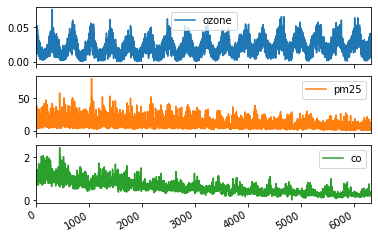

In [19]:
# Plotting data
data.plot(subplots=True)
plt.show()

In [ ]:
Pandas makes it easy to turn a DataFrame into a time series!

###### Comparing annual stock price trends

Below I will select sub-periods from a time series.

I'll use that to compare the performance for three years of Yahoo stock prices.

I'll load the 'yahoo.csv' file in a variable yahoo with DateTimeIndex and a single column price.

In [22]:
filepath1 = '/Users/MuhammadBilal/Desktop/Data Camp/Time Series with Python/Manipulating Time series data in python/Datasets/stock_data/yahoo.csv'

In [45]:
yahoo = pd.read_csv(filepath1)

In [46]:
yahoo.head()

,date,price
0,2013-01-02,20.08
1,2013-01-03,19.78
2,2013-01-04,19.86
3,2013-01-07,19.40
4,2013-01-08,19.66


In [47]:
yahoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 2 columns):
date     782 non-null object
price    756 non-null float64
dtypes: float64(1), object(1)
memory usage: 12.3+ KB


In [48]:
# Converting string dates to datetime64
yahoo.date = pd.to_datetime(yahoo.date)

In [49]:
# Setting date column as index
yahoo.set_index('date', inplace=True)

In [50]:
yahoo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 782 entries, 2013-01-02 to 2015-12-31
Data columns (total 1 columns):
price    756 non-null float64
dtypes: float64(1)
memory usage: 12.2 KB


In [51]:
# Converting DateTimeIndex to calendar year frequency
yahoo.asfreq('Y').info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3 entries, 2013-12-31 to 2015-12-31
Freq: A-DEC
Data columns (total 1 columns):
price    3 non-null float64
dtypes: float64(1)
memory usage: 48.0 bytes


pd.dataframe(data=yahoo, index=index).info()

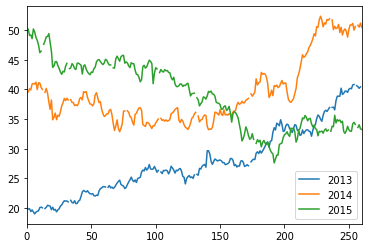

In [52]:
# Creating dataframe prices here
prices = pd.DataFrame()

# Selecting data for each year and concatenate with prices here 
for year in ['2013', '2014', '2015']:
    price_per_year = yahoo.loc[year, ['price']].reset_index(drop=True)
    price_per_year.rename(columns={'price': year}, inplace=True)
    prices = pd.concat([prices, price_per_year], axis=1)

# Plot prices
prices.plot()
plt.show()

In [ ]:
The plot I just created shows Yahoo's stock price in three different years.

###### Setting and changing time series frequency

I will work on assigning a frequency to a DateTimeIndex, and then change this frequency.

Now, I'll use data on the daily carbon monoxide concentration in NYC, LA and Chicago from 2005-17.

I'll set the frequency to calendar daily and then resample to monthly frequency, and visualize both series to see how the different frequencies affect the data.


In [53]:
filepath2 = '/Users/MuhammadBilal/Desktop/Data Camp/Time Series with Python/Manipulating Time series data in python/Datasets/air_quality_data/co_cities.csv'

In [88]:
co = pd.read_csv(filepath2)
co.head()

,date,Chicago,Los Angeles,New York
0,2005-01-01,0.317763,0.777657,0.639830
1,2005-01-03,0.520833,0.349547,0.969572
2,2005-01-04,0.477083,0.626630,0.905208
3,2005-01-05,0.348822,0.613814,0.769176
4,2005-01-06,0.572917,0.792596,0.815761


In [89]:
# Converting the date column to datetime64
co.date = pd.to_datetime(co.date)

In [90]:
# Setting date column as index
co.set_index('date', inplace=True)

In [93]:
co.asfreq('D').info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2191 entries, 2005-01-01 to 2010-12-31
Freq: D
Data columns (total 3 columns):
Chicago        1898 non-null float64
Los Angeles    1898 non-null float64
New York       1898 non-null float64
dtypes: float64(3)
memory usage: 68.5 KB


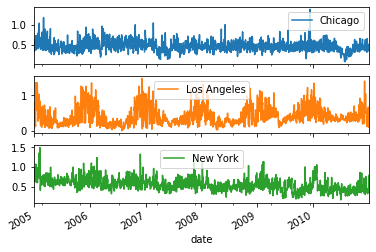

In [94]:
# Plotting data
co.plot(subplots=True)
plt.show()

In [95]:
# Set frequency to monthly
co = co.asfreq('M')

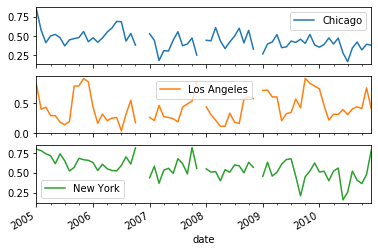

In [96]:
# Plot the data
co.plot(subplots=True)
plt.show()

In [ ]:
How does changing the frequency of the data affect the plot output?

###### Shifting stock prices across time

The first method to manipulate time series I'll work on is .shift(), which allows you shift all values in a Series or DataFrame by a number of periods to a different time along the DateTimeIndex.

Let's use this to visually compare a stock price series for Google shifted 90 business days into both past and future.

In [98]:
filepath3 = '/Users/MuhammadBilal/Desktop/Data Camp/Time Series with Python/Manipulating Time series data in python/Datasets/stock_data/google.csv'

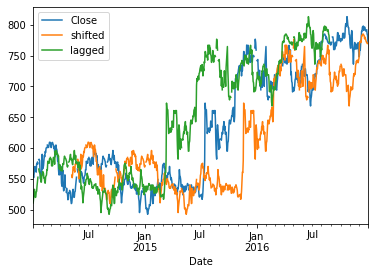

In [103]:
# Importing data here
google = pd.read_csv(filepath3,parse_dates=['Date'],index_col='Date')

# Setting data frequency to business daily
google = google.asfreq('B')

# Creating 'lagged' and 'shifted'
google['shifted'] = google.Close.shift(periods=90)
google['lagged'] = google.Close.shift(periods=-90)

# Plotting the google price series
google.plot()
plt.show()

In [ ]:
Now we can visually compare the time series to itself at different points in time.

###### Calculating stock price changes

I will work on how to calculate returns using current and shifted prices as input. Now I'll practice a similar calculation to calculate absolute changes from current and shifted prices, and compare the result to the function .diff().


In [109]:
filepath4 = '/Users/MuhammadBilal/Desktop/Data Camp/Time Series with Python/Manipulating Time series data in python/Datasets/stock_data/yahoo.csv'

In [116]:
# Importing data here
yahoo = pd.read_csv(filepath4,parse_dates=['date'],index_col='date')

# Setting data frequency to business daily
yahoo = yahoo.asfreq('B')

In [117]:
# Created shifted_30 here
yahoo['shifted_30'] = yahoo.price.shift(periods=30)

# Subtracting shifted_30 from price
yahoo['change_30'] = yahoo.price - yahoo.shifted_30

# Getting the 30-day price difference
yahoo['diff_30'] = yahoo.price.diff(periods=30)

# Inspecting the last five rows of price
print(yahoo.tail())

# Showing the value_counts of the difference between abs_change_30 and difference_30
print(yahoo.change_30.sub(yahoo.diff_30).value_counts())

            price  shifted_30  change_30  diff_30
date                                             
2015-12-25    NaN       32.19        NaN      NaN
2015-12-28  33.60       32.94       0.66     0.66
2015-12-29  34.04       32.86       1.18     1.18
2015-12-30  33.37       32.98       0.39     0.39
2015-12-31  33.26       32.62       0.64     0.64
0.0    703
dtype: int64


In [ ]:
There's usually more than one way to get to the same result when working with data.

###### Plotting multi-period returns

There is also a  time series method .pct_change(). Let's use this function to calculate returns for various calendar day periods, and plot the result to compare the different patterns.

I'll be using Google stock prices from 2014-2016.

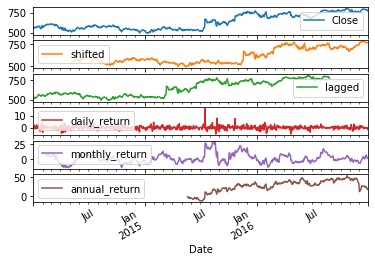

In [118]:
# Creating daily_return
google['daily_return'] = google.Close.pct_change().mul(100)

# Creating monthly_return
google['monthly_return'] = google.Close.pct_change(30).mul(100)

# Creating annual_return
google['annual_return'] = google.Close.pct_change(360).mul(100)

# Plotting the result
google.plot(subplots=True)
plt.show()

In [ ]:
How do the returns for different periods compare?

###### Basic Time Series Metrics & Resampling

I will now dive deeper into the essential time series functionality made available through the pandas DataTimeIndex. It introduces resampling and how to compare different time series by normalizing their start points.


###### Comparing the performance of several asset classes

We can easily compare several time series by normalizing their starting points to 100, and plot the result.

To broaden our perspective on financial markets, let's compare four key assets: stocks, bonds, gold, and oil.

In [123]:
filepath4 = '/Users/MuhammadBilal/Desktop/Data Camp/Time Series with Python/Manipulating Time series data in python/Datasets/stock_data/asset_classes.csv'

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2469 entries, 2007-06-29 to 2017-06-26
Data columns (total 4 columns):
SP500    2469 non-null float64
Bonds    2469 non-null float64
Gold     2469 non-null float64
Oil      2469 non-null float64
dtypes: float64(4)
memory usage: 96.4 KB
None


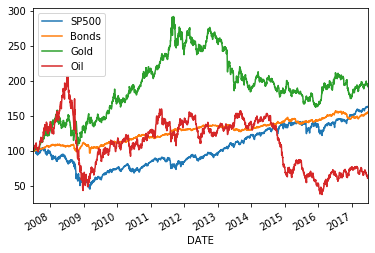

In [124]:
# Import data here
prices = pd.read_csv(filepath4,parse_dates=['DATE'],index_col='DATE')

# Inspect prices here
print(prices.info())

# Select first prices
first_prices = prices.iloc[0]

# Create normalized
normalized = prices.div(first_prices).mul(100)

# Plot normalized
normalized.plot()
plt.show()


In [ ]:
Normalizing series is a common step in time series analysis.

###### Comparing stock prices with a benchmark

Here I will compare the performance of various stocks against a benchmark. I will try to learn more about the stock market by comparing the three largest stocks on the NYSE to the Dow Jones Industrial Average, which contains the 30 largest US companies.

The three largest companies on the NYSE are:
    
Company	Stock Ticker

Johnson & Johnson	JNJ

Exxon Mobil	XOM

JP Morgan Chase	JPM


In [130]:
filepath5 = '/Users/MuhammadBilal/Desktop/Data Camp/Time Series with Python/Manipulating Time series data in python/Datasets/stock_data/nyse.csv'
filepath6 = '/Users/MuhammadBilal/Desktop/Data Camp/Time Series with Python/Manipulating Time series data in python/Datasets/stock_data/dow_jones.csv'

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 4 columns):
JNJ     1762 non-null float64
JPM     1762 non-null float64
XOM     1762 non-null float64
DJIA    1762 non-null float64
dtypes: float64(4)
memory usage: 68.8 KB
None


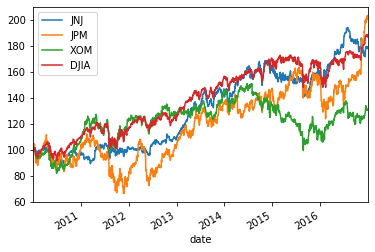

In [131]:
# Importing stock prices and index here
stocks = pd.read_csv(filepath5,parse_dates=['date'],index_col='date')
dow_jones = pd.read_csv(filepath6,parse_dates=['date'],index_col='date')

# Concatenate data and inspect result here
data = pd.concat([stocks,dow_jones],axis=1)
print(data.info())

# Normalize and plot your data here
data.div(data.iloc[0]).mul(100).plot()
plt.show()

In [ ]:
Trusting pandas to align values means you can easily work with multiple series.

###### Plotting performance difference vs benchmark index

I'll calculate and plot the performance difference of a stock in percentage points relative to a benchmark index.

Let's compare the performance of Microsoft (MSFT) and Apple (AAPL) to the S&P 500 over the last 10 years.

In [138]:
filepath7='/Users/MuhammadBilal/Desktop/Data Camp/Time Series with Python/Manipulating Time series data in python/Datasets/stock_data/msft_aapl.csv'
filepath8='/Users/MuhammadBilal/Desktop/Data Camp/Time Series with Python/Manipulating Time series data in python/Datasets/stock_data/sp500.csv'

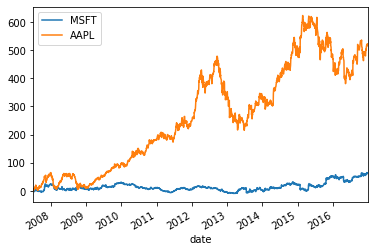

In [140]:
# Creating tickers
tickers = ['MSFT','AAPL']

# Importing stock data here
stocks = pd.read_csv(filepath7,parse_dates=['date'],index_col='date')

# Importing index here
sp500 = pd.read_csv(filepath8,parse_dates=['date'],index_col='date')

# Concatenating stocks and index here
data = pd.concat([stocks,sp500],axis=1).dropna()

# Normalizing data
normalized = data.div(data.iloc[0]).mul(100)

# Subtracting the normalized index from the normalized stock prices, and plotting the result
normalized[tickers].sub(normalized['SP500'],axis=0).plot()
plt.show()

In [ ]:
Now we can compare these stocks to the overall market so you we more easily spot trends and outliers.

###### Converting monthly to weekly data

I will work on using .reindex() to conform an existing time series to a DateTimeIndex at a different frequency.

I will practice this method by creating monthly data and then converting this data to weekly frequency while applying various fill logic options for missing values.


In [142]:
# Set start and end dates
start = '2016-1-1'
end = '2016-2-29'

# Create monthly_dates here
monthly_dates = pd.date_range(start=start,end=end,freq='M')


# Create and print monthly here
monthly = pd.Series(data=[1, 2], index=monthly_dates)
print(monthly)

# Create weekly_dates here
weekly_dates = pd.date_range(start=start,end=end,freq='W')

# Print monthly, reindexed using weekly_dates
print(monthly.reindex(weekly_dates))
print(monthly.reindex(weekly_dates,method='bfill'))
print(monthly.reindex(weekly_dates,method='ffill'))


2016-01-31    1
2016-02-29    2
Freq: M, dtype: int64
2016-01-03    NaN
2016-01-10    NaN
2016-01-17    NaN
2016-01-24    NaN
2016-01-31    1.0
2016-02-07    NaN
2016-02-14    NaN
2016-02-21    NaN
2016-02-28    NaN
Freq: W-SUN, dtype: float64
2016-01-03    1
2016-01-10    1
2016-01-17    1
2016-01-24    1
2016-01-31    1
2016-02-07    2
2016-02-14    2
2016-02-21    2
2016-02-28    2
Freq: W-SUN, dtype: int64
2016-01-03    NaN
2016-01-10    NaN
2016-01-17    NaN
2016-01-24    NaN
2016-01-31    1.0
2016-02-07    1.0
2016-02-14    1.0
2016-02-21    1.0
2016-02-28    1.0
Freq: W-SUN, dtype: float64


In [ ]:
How do the series created with different fill methods compare?

In [145]:
monthly_dates

DatetimeIndex(['2016-01-31', '2016-02-29'], dtype='datetime64[ns]', freq='M')

In [146]:
monthly

2016-01-31    1
2016-02-29    2
Freq: M, dtype: int64

In [147]:
weekly_dates

DatetimeIndex(['2016-01-03', '2016-01-10', '2016-01-17', '2016-01-24',
               '2016-01-31', '2016-02-07', '2016-02-14', '2016-02-21',
               '2016-02-28'],
              dtype='datetime64[ns]', freq='W-SUN')

###### Creating weekly from monthly unemployment data

The civilian US unemployment rate is reported monthly. We may need more frequent data, but that's no problem because I just worked to to upsample a time series.

I'll work with the time series data for the last 20 years, and apply a few options to fill in missing values before plotting the weekly series.


In [153]:
filepath9 = '/Users/MuhammadBilal/Desktop/Data Camp/Time Series with Python/Manipulating Time series data in python/Datasets/stock_data/unrate_2000.csv'

            UNRATE
date              
2000-01-02     NaN
2000-01-09     NaN
2000-01-16     NaN
2000-01-23     NaN
2000-01-30     NaN
            UNRATE
date              
2000-01-02     4.1
2000-01-09     4.1
2000-01-16     4.1
2000-01-23     4.1
2000-01-30     4.1
            UNRATE
date              
2000-01-02     4.0
2000-01-09     4.0
2000-01-16     4.0
2000-01-23     4.0
2000-01-30     4.0


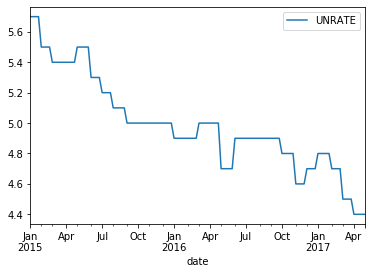

In [154]:
# Importing data here
data = pd.read_csv(filepath9, parse_dates=['date'], index_col='date')

# Showing first five rows of weekly series
print(data.asfreq('W').head())

# Showing first five rows of weekly series with bfill option
print(data.asfreq('W', method='bfill').head())

# Creating weekly series with ffill option and show first five rows
weekly_ffill = data.asfreq('W', method='ffill')
print(weekly_ffill.head())

# Plotting weekly_fill starting 2015 here 
weekly_ffill.loc['2015':].plot()
plt.show()

In [ ]:
The plots should help you compare the different fill methods in pandas.

###### Use interpolation to create weekly employment data

I used the civilian US unemployment rate, and converted it from monthly to weekly frequency using simple forward or backfill methods.

I will ompare previous approach to the new .interpolate() method. 

In [158]:
filepath10 = '/Users/MuhammadBilal/Desktop/Data Camp/Time Series with Python/Manipulating Time series data in python/Datasets/stock_data/unrate.csv'

In [161]:
monthly = pd.read_csv(filepath10, parse_dates=['DATE'], index_col='DATE')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 85 entries, 2010-01-01 to 2017-01-01
Data columns (total 1 columns):
UNRATE    85 non-null float64
dtypes: float64(1)
memory usage: 1.3 KB
None


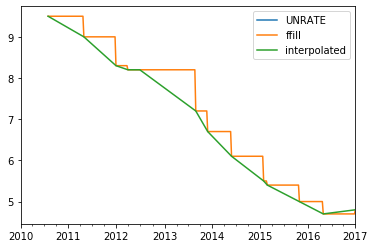

In [162]:
# Inspect data here
print(monthly.info())

# Create weekly dates
weekly_dates = pd.date_range(start=monthly.index.min(),end=monthly.index.max(),freq='W')

# Reindex monthly to weekly data
weekly = monthly.reindex(weekly_dates)

# Create ffill and interpolated columns
weekly['ffill'] = weekly.UNRATE.ffill()
weekly['interpolated'] = weekly.UNRATE.interpolate()

# Plot weekly
weekly.plot()
plt.show()

In [ ]:
 Interpolating is a useful way to create smoother time series when resampling.

###### Interpolate debt/GDP and compare to unemployment

I have worked on interpolate time series, I can now apply this new skill to the quarterly debt/GDP series, and compare the result to the monthly unemployment rate.

In [163]:
filepath11 = '/Users/MuhammadBilal/Desktop/Data Camp/Time Series with Python/Manipulating Time series data in python/Datasets/stock_data/debt_unemployment.csv'

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 2010-01-01 to 2017-05-01
Data columns (total 2 columns):
Debt/GDP        29 non-null float64
Unemployment    89 non-null float64
dtypes: float64(2)
memory usage: 2.1 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 2010-01-01 to 2017-05-01
Data columns (total 2 columns):
Debt/GDP        89 non-null float64
Unemployment    89 non-null float64
dtypes: float64(2)
memory usage: 2.1 KB
None


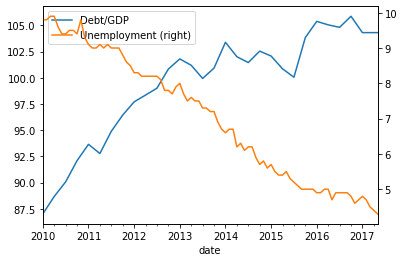

In [164]:
# Import & inspect data here
data =data = pd.read_csv(filepath11,parse_dates=['date'],index_col='date')
print(data.info())

# Interpolate and inspect here
interpolated = data.interpolate()
print(interpolated.info())

# Plot interpolated data here
interpolated.plot(secondary_y='Unemployment')
plt.show()


###### Comparing weekly, monthly and annual ozone trends for NYC & LA

Here I will demonstrate how to downsample and aggregate time series on air quality.

First, I'll apply this new skill to ozone data for both NYC and LA since 2000 to compare the air quality trend at weekly, monthly and annual frequencies and explore how different resampling periods impact the visualization.

In [173]:
filepath12 = '/Users/MuhammadBilal/Desktop/Data Camp/Time Series with Python/Manipulating Time series data in python/Datasets/air_quality_data/ozone_nyla.csv'

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 2 columns):
Los Angeles    5488 non-null float64
New York       6167 non-null float64
dtypes: float64(2)
memory usage: 147.4 KB
None


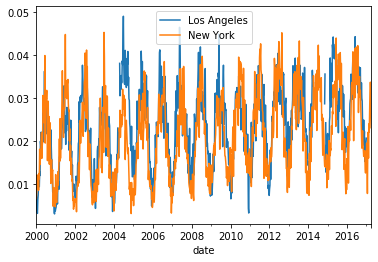

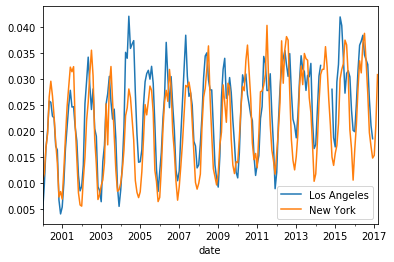

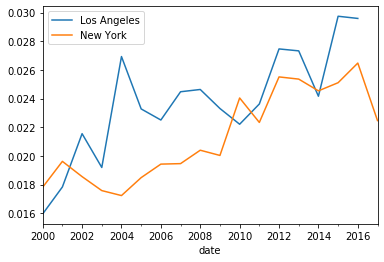

In [174]:
# Importing and inspect data here
ozone = pd.read_csv(filepath12,parse_dates=['date'],index_col='date')
print(ozone.info())

# Calculating and plot the weekly average ozone trend
ozone.resample('W').mean().plot()
plt.show()

# Calculating and plot the monthly average ozone trend
ozone.resample('M').mean().plot()
plt.show()

# Calculating and plot the annual average ozone trend
ozone.resample('A').mean().plot()
plt.show()

###### Comparing monthly average stock prices for Facebook and Google

Now, I'll apply my new resampling skills to daily stock price series for Facebook and Google for the 2015-2016 period to compare the trend of the monthly averages.

In [175]:
filepath13 = '/Users/MuhammadBilal/Desktop/Data Camp/Time Series with Python/Manipulating Time series data in python/Datasets/stock_data/goog_fb.csv'

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 504 entries, 2015-01-02 to 2016-12-30
Data columns (total 2 columns):
FB      504 non-null float64
GOOG    504 non-null float64
dtypes: float64(2)
memory usage: 11.8 KB
None


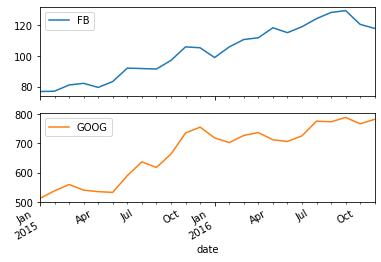

In [176]:
# Importing and inspect data here
stocks = pd.read_csv(filepath13,parse_dates=['date'],index_col='date')
print(stocks.info())

# Calculate and plot the monthly averages
monthly_average = stocks.resample('M').mean()
monthly_average.plot(subplots=True)
plt.show()

###### Comparing quarterly GDP growth rate and stock returns

With downsample and aggregate time series, we can compare higher-frequency stock price series to lower-frequency economic time series.

As a first example, let's compare the quarterly GDP growth rate to the quarterly rate of return on the (resampled) Dow Jones Industrial index of 30 large US stocks.

GDP growth is reported at the beginning of each quarter for the previous quarter. To calculate matching stock returns, I'll resample the stock index to quarter start frequency using the alias 'QS', and aggregating using the .first() observations.


In [177]:
filepath14 = '/Users/MuhammadBilal/Desktop/Data Camp/Time Series with Python/Manipulating Time series data in python/Datasets/stock_data/gdp_growth.csv'
filepath15 = '/Users/MuhammadBilal/Desktop/Data Camp/Time Series with Python/Manipulating Time series data in python/Datasets/stock_data/djia.csv'

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41 entries, 2007-01-01 to 2017-01-01
Data columns (total 1 columns):
gdp_growth    41 non-null float64
dtypes: float64(1)
memory usage: 656.0 bytes
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2610 entries, 2007-06-29 to 2017-06-29
Data columns (total 1 columns):
djia    2519 non-null float64
dtypes: float64(1)
memory usage: 40.8 KB
None


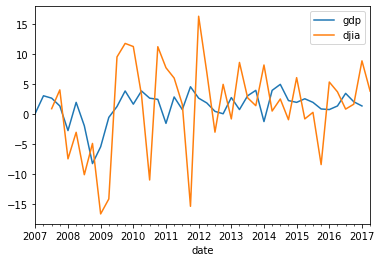

In [179]:
# Importing and inspecting gdp_growth here
gdp_growth = pd.read_csv(filepath14,parse_dates=['date'],index_col='date')
print(gdp_growth.info())

# Importing and inspecting djia here
djia = pd.read_csv(filepath15,parse_dates=['date'],index_col='date')
print(djia.info())

# Calculating djia quarterly returns here 
djia_quarterly = djia.resample('QS').first()
djia_quarterly_return = djia_quarterly.pct_change().mul(100)

# Concatenating, rename and plot djia_quarterly_return and gdp_growth here 
data = pd.concat([gdp_growth,djia_quarterly_return],axis=1)
data.columns = ['gdp','djia']
data.plot()
plt.show()

###### Visualizing monthly mean, median and standard deviation of S&P500 returns

I have worked on how to calculate several aggregate statistics from upsampled data.

Let's use this to explore how the monthly mean, median and standard deviation of daily S&P500 returns have trended over the last 10 years.

In [180]:
filepath16 = '/Users/MuhammadBilal/Desktop/Data Camp/Time Series with Python/Manipulating Time series data in python/Datasets/stock_data/sp500.csv'

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2395 entries, 2007-06-29 to 2016-12-30
Data columns (total 1 columns):
SP500    2395 non-null float64
dtypes: float64(1)
memory usage: 37.4 KB
None


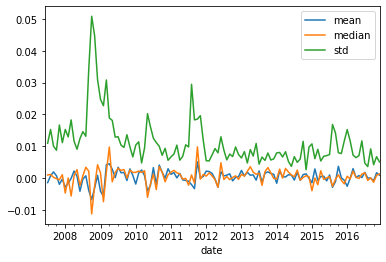

In [181]:
# Importing data here
sp500 = pd.read_csv(filepath16,parse_dates=['date'],index_col='date')
print(sp500.info())

# Calculating daily returns here
daily_returns = sp500.squeeze().pct_change()

# Resampling and calculate statistics
stats = daily_returns.resample('M').agg(['mean','median','std'])

# Plotting stats here
stats.plot()
plt.show()

###### Window Functions: Rolling & Expanding Metrics – chapter 3 
Now I will use window function to calculate time series metrics for both rolling and expanding windows.


###### Rolling average air quality since 2010 for new york city

To practice rolling window functions, I'll start with air quality trends for New York City since 2010. In particular, I'll be using the daily Ozone concentration levels provided by the Environmental Protection Agency to calculate & plot the 90 and 360 day rolling average.


In [182]:
filepath17 = '/Users/MuhammadBilal/Desktop/Data Camp/Time Series with Python/Manipulating Time series data in python/Datasets/air_quality_data/ozone_nyc.csv'

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 1 columns):
Ozone    6167 non-null float64
dtypes: float64(1)
memory usage: 98.3 KB
None


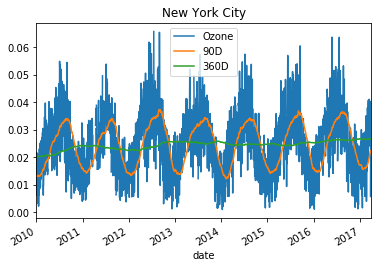

In [183]:
# Importing and inspect ozone data here
data = pd.read_csv(filepath17,parse_dates=['date'],index_col='date')
print(data.info())

# Calculating 90d and 360d rolling mean for the last price
data['90D'] = data.Ozone.rolling('90D').mean()
data['360D'] = data.Ozone.rolling('360D').mean()

# Plotting data
data.loc['2010':].plot(title='New York City')
plt.show()

The different rolling windows help us see any long term trends that are hard to spot in the original data?

###### Rolling 360-day median & std. deviation for nyc ozone data since 2000

I will now work on calculating several rolling statistics using the .agg() method, similar to .groupby().

I will take a closer look at the air quality history of NYC using the Ozone data. The daily data are very volatile, so using a longer term rolling average can help reveal a longer term trend.

I'll be using a 360 day rolling window, and .agg() to calculate the rolling mean and standard deviation for the daily average ozone values since 2000.


In [188]:
filepath17 = '/Users/MuhammadBilal/Desktop/Data Camp/Time Series with Python/Manipulating Time series data in python/Datasets/air_quality_data/ozone_nyc.csv'

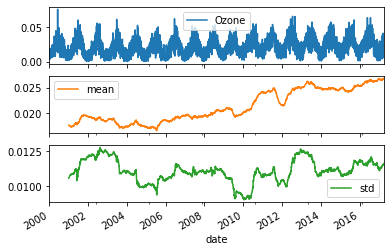

In [189]:
# Import and inspect ozone data here
data = pd.read_csv(filepath17,parse_dates=['date'],index_col='date').dropna()

# Calculate the rolling mean and std here
rolling_stats = data.Ozone.rolling(360).agg(['mean','std'])

# Join rolling_stats with ozone data
stats = data.join(rolling_stats)

# Plot stats
stats.plot(subplots=True)
plt.show()

How does adding the standard deviation help you understand what's happening in the orignal series?

###### Rolling quantiles for daily air quality in nyc

Now I will work on calculating rolling quantiles to describe changes in the dispersion of a time series over time in a way that is less sensitive to outliers than using the mean and standard deviation.

Let's calculate rolling quantiles - at 10%, 50% (median) and 90% - of the distribution of daily average ozone concentration in NYC using a 360-day rolling window.


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6167 entries, 2000-01-01 to 2017-03-31
Data columns (total 1 columns):
Ozone    6167 non-null float64
dtypes: float64(1)
memory usage: 256.4 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6300 entries, 2000-01-01 to 2017-03-31
Freq: D
Data columns (total 1 columns):
Ozone    6300 non-null float64
dtypes: float64(1)
memory usage: 98.4 KB
None


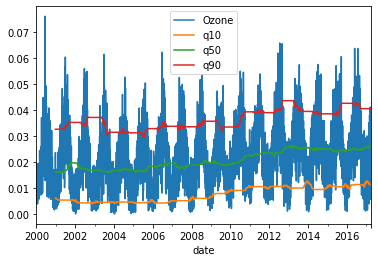

In [191]:
# Resampling, interpolating and inspecting ozone data here
print(data.info())

data = data.resample('D').interpolate()
print(data.info())

# Creating the rolling window
rolling = data.Ozone.rolling(360)

# Inserting the rolling quantiles to the monthly returns
data['q10'] = rolling.quantile(.1)
data['q50'] = rolling.quantile(.5)
data['q90'] = rolling.quantile(.9)

# Plotting monthly returns
data.plot()
plt.show()

The rolling quantiles help show the volatility of the series.

###### Cumulative sum vs .diff()

Now I will work on expanding windows that allow you to run cumulative calculations.

The cumulative sum method has in fact the opposite effect of the .diff() method.

To illustrate this, let's use the Google stock price time series, create the differences between prices, and reconstruct the series using the cumulative sum.

In [199]:
filepath18 = '/Users/MuhammadBilal/Desktop/Data Camp/Time Series with Python/Manipulating Time series data in python/Datasets/stock_data/google.csv'

In [200]:
# Importing data here
data = pd.read_csv(filepath18,parse_dates=['Date'],index_col='Date')

In [ ]:
The .cumsum() method allows you to reconstruct the original data from the differences.

In [204]:
data.head()

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,558.10


In [205]:
Data = data.dropna()

In [206]:
Data

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-06,558.10
2014-01-07,568.86
2014-01-08,570.04
...,...
2016-12-23,789.91
2016-12-27,791.55
2016-12-28,785.05


In [209]:
# Calculating differences
differences = Data.diff().dropna()

# Selecting start price
start_price = Data.first('D')

# Calculating cumulative sum
cumulative_sum = start_price.append(differences).cumsum()

# Validating cumulative sum equals data
print(Data.equals(cumulative_sum))

True


The .cumsum() method allows you to reconstruct the original data from the differences.

###### Cumulative return on $1,000 invested in google vs apple I

I'll put cumulative return calculations to practical use, let's compare how much $1,000 would be worth if invested in Google ('GOOG') or Apple ('AAPL') in 2010.


In [214]:
filepath19 = '/Users/MuhammadBilal/Desktop/Data Camp/Time Series with Python/Manipulating Time series data in python/Datasets/stock_data/apple_google.csv'

In [218]:
# Importing data here
data = pd.read_csv(filepath19,parse_dates=['Date'],index_col='Date')

In [219]:
data.head()

,AAPL,GOOG
Date,,
2010-01-04,NaN,313.06
2010-01-05,NaN,311.68
2010-01-06,NaN,303.83
2010-01-07,NaN,296.75
2010-01-08,NaN,300.71


            AAPL    GOOG
Date                    
2010-01-04   NaN  313.06
2010-01-05   NaN  311.68
2010-01-06   NaN  303.83
2010-01-07   NaN  296.75
2010-01-08   NaN  300.71
            AAPL      GOOG
Date                      
2010-01-04   NaN       NaN
2010-01-05   NaN -0.004408
2010-01-06   NaN -0.025186
2010-01-07   NaN -0.023303
2010-01-08   NaN  0.013345


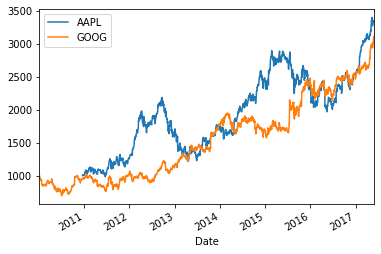

In [220]:
# Define your investment
investment = 1000
print(data.head())

# Calculate the daily returns here
returns = data.pct_change()
print(returns[:5])

# Calculate the cumulative returns here
returns_plus_one = returns + 1
cumulative_return = returns_plus_one.cumprod()

# Calculate and plot the investment return here 
cumulative_return.mul(investment).plot()
plt.show()

Now let's take a look at the rolling annual returns on this investment.

###### Cumulative return on $1,000 invested in google vs apple II

Apple outperformed Google over the entire period, but this may have been different over various 1-year sub periods, so that switching between the two stocks might have yielded an even better result.

To analyze this, calculate that cumulative return for rolling 1-year periods, and then plot the returns to see when each stock was superior.

            AAPL    GOOG
Date                    
2010-01-04   NaN  313.06
2010-01-05   NaN  311.68
2010-01-06   NaN  303.83
2010-01-07   NaN  296.75
2010-01-08   NaN  300.71
            AAPL      GOOG
Date                      
2010-01-04   NaN       NaN
2010-01-05   NaN -0.004408
2010-01-06   NaN -0.025186
2010-01-07   NaN -0.023303
2010-01-08   NaN  0.013345
            AAPL  GOOG
Date                  
2010-01-04   NaN   NaN
2010-01-05   NaN   NaN
2010-01-06   NaN   NaN
2010-01-07   NaN   NaN
2010-01-08   NaN   NaN


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  app.launch_new_instance()


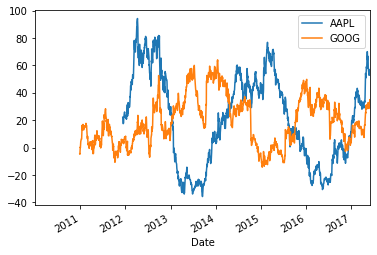

In [221]:
# Importing numpy
import numpy as np

# Defining a multi_period_return function
def multi_period_return(period_returns):
    return np.prod(period_returns + 1) - 1
    
print(data.head())

# Calculating daily returns
daily_returns = data.pct_change()
print(daily_returns.head())


# Calculating rolling_annual_returns
rolling_annual_returns = daily_returns.rolling('360D').apply(multi_period_return)
print(rolling_annual_returns.head())


# Plotting rolling_annual_returns
rolling_annual_returns.mul(100).plot()
plt.show()

Do you think it's better to invest in Google or Apple?

###### Random walk I

I will work on generating a random walk of returns, and converting this random return series into a random stock price path.

I'll build my own random walk by drawing random numbers from the normal distribution with the help of numpy.


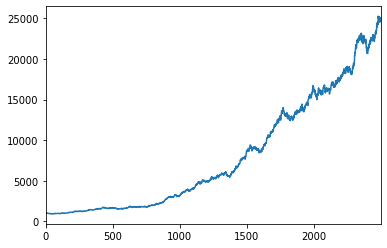

In [223]:
from numpy.random import normal, seed
from scipy.stats import norm

# Setting seed here
seed(42)

# Creating random_walk
random_walk = normal(loc=.001, scale=.01, size=2500)

# Converting random_walk to pd.series
random_walk = pd.Series(random_walk)

# Creating random_prices
random_prices = random_walk.add(1).cumprod()

# Plotting random_prices here
random_prices.mul(1000).plot()
plt.show()

Are you ready to get started on the next part of your random walk?

###### Random walk II

I will create a random walk of returns by sampling from actual returns, and will use this random sample to create a random stock price path.

In this exercise, I'll build a random walk using historical returns from Facebook's stock price since IPO through the end of May 31, 2017. Then I'll simulate an alternative random price path in the next exercise.

In [454]:
filepath20 = '/Users/MuhammadBilal/Desktop/Data Camp/Time Series with Python/Manipulating Time series data in python/Datasets/stock_data/fb.csv'

In [455]:
# Importing data here
fb = pd.read_csv(filepath20,parse_dates=['date'],index_col='date')

In [448]:
fb.head()

,price
date,
2012-05-17,38.00
2012-05-18,38.23
2012-05-21,34.03
2012-05-22,31.00
2012-05-23,32.00


In [449]:
fb = (fb.loc[:,'price'])

In [450]:
fb.shape

(1267,)

In [451]:
fb.head()

date
2012-05-17    38.00
2012-05-18    38.23
2012-05-21    34.03
2012-05-22    31.00
2012-05-23    32.00
Name: price, dtype: float64

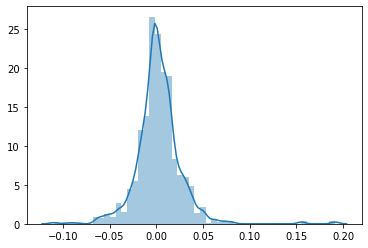

In [452]:
from numpy.random import choice, seed

import seaborn as sns

# Setting seed here
seed(42)

# Calculating daily_returns here
daily_returns = fb.pct_change().dropna()

# Getting n_obs
n_obs = daily_returns.count()

# Creating random_walk
random_walk = choice(daily_returns, size=n_obs)

# Converting random_walk to pd.series
random_walk = pd.Series(random_walk, index=daily_returns.index)

# Plotting random_walk distribution
sns.distplot(random_walk)
plt.show()



Getting ready to finish up this random walk!

###### Random walk III

I'll complete our random walk simulation using Facebook stock returns over the last five years. I'll start off with a random sample of returns like the one we've generated above and use it to create a random stock price path.

In [ ]:
# Importing data here
fb = pd.read_csv(filepath20,parse_dates=['date'],index_col='date')

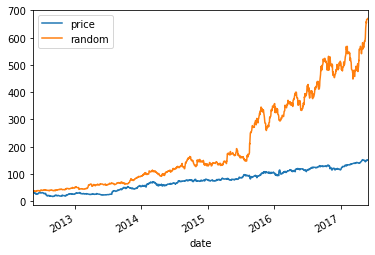

In [456]:
# Selecting fb start price here
start = fb.price.first('D')

# Adding 1 to random walk and appending to start
random_walk = random_walk.add(1)
random_price = start.append(random_walk)

# Calculating cumulative product here
random_price = random_price.cumprod()

# Inserting into fb and plot
fb['random'] = random_price
fb.plot()
plt.show()



###### Annual return correlations among several stocks

Here I will calculate correlations, and visualize the result.

I will use the historical stock prices for Apple (AAPL), Amazon (AMZN), IBM (IBM), WalMart (WMT), and Exxon Mobile (XOM) for the last 4,000 trading days from July 2001 until the end of May 2017.

I'll calculate the year-end returns, the pairwise correlations among all stocks, and visualize the result as an annotated heatmap.

In [461]:
filepath21 = '/Users/MuhammadBilal/Desktop/Data Camp/Time Series with Python/Manipulating Time series data in python/Datasets/stock_data/5_stocks.csv'

In [463]:
# Importing data here
data = pd.read_csv(filepath21,parse_dates=['Date'],index_col='Date')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4001 entries, 2001-07-05 to 2017-05-31
Data columns (total 5 columns):
AAPL    4000 non-null float64
AMZN    4000 non-null float64
IBM     4000 non-null float64
WMT     4000 non-null float64
XOM     4000 non-null float64
dtypes: float64(5)
memory usage: 187.5 KB
None
          AAPL      AMZN       IBM       WMT       XOM
AAPL  1.000000  0.208731  0.460568 -0.183553  0.336413
AMZN  0.208731  1.000000  0.346407 -0.367620 -0.133965
IBM   0.460568  0.346407  1.000000  0.155445  0.367253
WMT  -0.183553 -0.367620  0.155445  1.000000  0.178833
XOM   0.336413 -0.133965  0.367253  0.178833  1.000000


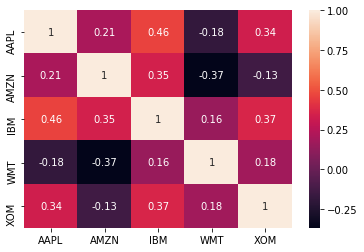

In [468]:
# Inspecting data here
print(data.info())

# Calculating year-end prices here
annual_prices = data.resample('A').last()

# Calculating annual returns here
annual_returns = annual_prices.pct_change()

# Calculating and print the correlation matrix here
correlations = annual_returns.corr()
print(correlations)

# Visualizing the correlations as heatmap here
ax = sns.heatmap(correlations, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

Heatmaps are a great way to visualize correlation matrices.

###### Exploring and clean company listing information

To get started with the construction of a market-value based index, I'll work with the combined listing info for the three largest US stock exchanges, the NYSE, the NASDAQ and the AMEX.

I will calculate market-cap weights for these stocks.

I will load the listings data set with listings information from the NYSE, NASDAQ, and AMEX. The column 'Market Capitalization' is already measured in USD mn.

In [470]:
filepath22 = '/Users/MuhammadBilal/Desktop/Data Camp/Time Series with Python/Manipulating Time series data in python/Datasets/stock_data/listings.xlsx'

In [483]:
# Importing data here
listings = pd.ExcelFile(filepath22)
listings = listings.parse('nyse', na_values='n/a')


In [484]:
listings.head()

,Stock Symbol,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry
0,DDD,3D Systems Corporation,14.48,1.647165e+09,NaN,Technology,Computer Software: Prepackaged Software
1,MMM,3M Company,188.65,1.127366e+11,NaN,Health Care,Medical/Dental Instruments
2,WBAI,500.com Limited,13.96,5.793129e+08,2013.0,Consumer Services,Services-Misc. Amusement & Recreation
3,WUBA,58.com Inc.,36.11,5.225238e+09,2013.0,Technology,"Computer Software: Programming, Data Processing"
4,AHC,A.H. Belo Corporation,6.20,1.347351e+08,NaN,Consumer Services,Newspapers/Magazines


In [485]:
# Inspecting listings
print(listings.info())

# Moving 'stock symbol' into the index
listings.set_index('Stock Symbol',inplace=True)

# Dropping rows with missing 'sector' data
listings.dropna(subset=['Sector'], inplace=True)

# Selecting companies with ipo year before 2019
listings = listings[listings['IPO Year'] < 2019]

# Inspecting the new listings data
print(listings.info())

# Showing the number of companies per sector
print(listings.groupby('Sector').size().sort_values(ascending=False))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3147 entries, 0 to 3146
Data columns (total 7 columns):
Stock Symbol             3147 non-null object
Company Name             3147 non-null object
Last Sale                3079 non-null float64
Market Capitalization    3147 non-null float64
IPO Year                 1361 non-null float64
Sector                   2177 non-null object
Industry                 2177 non-null object
dtypes: float64(3), object(4)
memory usage: 172.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 967 entries, WBAI to ZTO
Data columns (total 6 columns):
Company Name             967 non-null object
Last Sale                967 non-null float64
Market Capitalization    967 non-null float64
IPO Year                 967 non-null float64
Sector                   967 non-null object
Industry                 967 non-null object
dtypes: float64(3), object(3)
memory usage: 52.9+ KB
None
Sector
Consumer Services        240
Finance                  132
Energy      

The data is squeaky clean now!

###### Selecting and inspecting index components

Now that we have imported and cleaned the listings data, we can proceed to select the index components as the largest company for each sector by market capitalization.

We'll also have the opportunity to take a closer look at the components, their last market value, and last price.

In [486]:
# Selecting largest company for each sector
components = listings.groupby(['Sector'])['Market Capitalization'].nlargest(1)

# Printing components, sorted by market cap
print(components.sort_values(ascending=False))

# Selecting stock symbols and print the result
tickers = components.index.get_level_values('Stock Symbol')
print(tickers)

# Printing company name, market cap, and last price for each component 
info_cols = ['Company Name', 'Market Capitalization', 'Last Sale']
print(listings.loc[tickers, info_cols].sort_values('Market Capitalization', ascending=False))

Sector                 Stock Symbol
Miscellaneous          BABA            2.755250e+11
Technology             ORCL            1.810461e+11
Health Care            ABBV            1.021961e+11
Transportation         UPS             9.018089e+10
Finance                GS              8.884059e+10
Consumer Non-Durables  ABEV            8.824020e+10
Basic Industries       RIO             7.043148e+10
Public Utilities       TEF             5.460981e+10
Capital Goods          GM              5.008634e+10
Consumer Services      LVS             4.438430e+10
Energy                 PAA             2.222300e+10
Consumer Durables      WRK             1.235490e+10
Name: Market Capitalization, dtype: float64
Index(['RIO', 'GM', 'WRK', 'ABEV', 'LVS', 'PAA', 'GS', 'ABBV', 'BABA', 'TEF',
       'ORCL', 'UPS'],
      dtype='object', name='Stock Symbol')
                                    Company Name  Market Capitalization  \
Stock Symbol                                                              
BA

We're ready for the next step in creating this index.

###### Importing index component price information

Now we'll use the stock symbols for the companies we selected above to calculate returns for each company.


In [488]:
filepath23 = '/Users/MuhammadBilal/Desktop/Data Camp/Time Series with Python/Manipulating Time series data in python/Datasets/stock_data/stock_data.csv'

Index(['RIO', 'GM', 'WRK', 'ABEV', 'LVS', 'PAA', 'GS', 'ABBV', 'BABA', 'TEF',
       'ORCL', 'UPS'],
      dtype='object', name='Stock Symbol')
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 12 columns):
AAPL    1761 non-null float64
AMGN    1761 non-null float64
AMZN    1761 non-null float64
CPRT    1761 non-null float64
EL      1762 non-null float64
GS      1762 non-null float64
ILMN    1761 non-null float64
MA      1762 non-null float64
PAA     1762 non-null float64
RIO     1762 non-null float64
TEF     1762 non-null float64
UPS     1762 non-null float64
dtypes: float64(12)
memory usage: 179.0 KB
None
             AAPL   AMGN    AMZN  CPRT     EL      GS   ILMN     MA    PAA  \
Date                                                                         
2010-01-04  30.57  57.72  133.90  4.55  24.27  173.08  30.55  25.68  27.00   
2010-01-05  30.63  57.22  134.69  4.55  24.18  176.14  30.35  25.61  27.30   
2010-01-06 

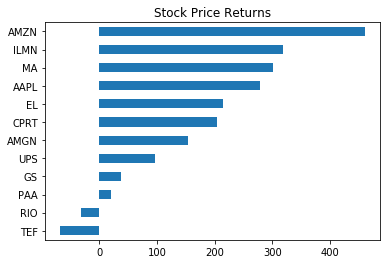

In [489]:
# Printing tickers
print(tickers)

# Importing prices and inspect result
stock_prices = pd.read_csv(filepath23,parse_dates=['Date'],index_col='Date')
print(stock_prices.info())
print(stock_prices.head())

# Calculate the returns    
price_return = stock_prices.iloc[-1].div(stock_prices.iloc[0]).sub(1).mul(100)

print(price_return.head())

# Plot horizontal bar chart of sorted price_return   
price_return.sort_values().plot(kind='barh',title='Stock Price Returns')
plt.show()

###### Calculating number of shares outstanding

The next step towards building a value-weighted index is to calculate the number of shares for each index component.

The number of shares will allow us to calculate the total market capitalization for each component given the historical price series next. 


In [497]:
# Inspect listings and print tickers
print(listings.info())
print(listings.head())
print(tickers)

# Selecting components and relevant columns from listings
components = listings.loc[tickers,['Market Capitalization','Last Sale']]

# Printing the first rows of components
print(components.head())

# Calculating the number of shares here
no_shares = components['Market Capitalization'].div(components['Last Sale'])

# Printing the sorted no_shares
print(no_shares.sort_values(ascending=False))

<class 'pandas.core.frame.DataFrame'>
Index: 967 entries, WBAI to ZTO
Data columns (total 6 columns):
Company Name             967 non-null object
Last Sale                967 non-null float64
Market Capitalization    967 non-null float64
IPO Year                 967 non-null float64
Sector                   967 non-null object
Industry                 967 non-null object
dtypes: float64(3), object(3)
memory usage: 92.9+ KB
None
                    Company Name  Last Sale  Market Capitalization  IPO Year  \
Stock Symbol                                                                   
WBAI             500.com Limited      13.96           5.793129e+08    2013.0   
WUBA                 58.com Inc.      36.11           5.225238e+09    2013.0   
ATEN          A10 Networks, Inc.       8.72           5.959822e+08    2014.0   
AAC           AAC Holdings, Inc.       8.08           1.914187e+08    2014.0   
ABBV                 AbbVie Inc.      64.13           1.021961e+11    2012.0   

      

Now we know which companies have the most shares.

###### Creating time series of market value

We can now use the number of shares to calculate the total market capitalization for each component and trading date from the historical price series.

The result will be the key input to construct the value-weighted stock index, which we will complete next. 

In [504]:
no_shares = components['Market Capitalization'].div(components['Last Sale'])
no_shares.head()

Stock Symbol
RIO     1.808718e+09
GM      1.500040e+09
WRK     2.504034e+08
ABEV    1.570110e+10
LVS     7.939946e+08
dtype: float64

Stock Symbol
WRK     2.504034e+08
GS      3.978174e+08
PAA     7.234050e+08
LVS     7.939946e+08
UPS     8.692972e+08
GM      1.500040e+09
ABBV    1.593577e+09
RIO     1.808718e+09
BABA    2.500000e+09
ORCL    4.114684e+09
TEF     5.037805e+09
ABEV    1.570110e+10
dtype: float64


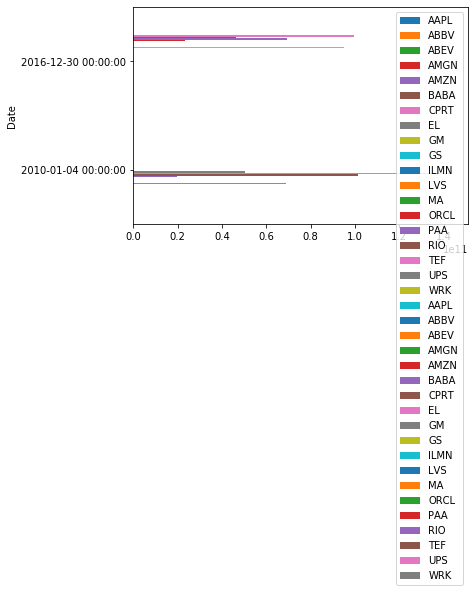

In [505]:
# Selecting the number of shares
#no_shares = components['shares']
print(no_shares.sort_values())

# Creating the series of market cap per ticker
market_cap = stock_prices.mul(no_shares)

# Selecting first and last market cap here
first_value = market_cap.first('D')
last_value = market_cap.last('D')


# Concatenating and plot first and last market cap here
pd.concat([first_value,last_value],axis=1).plot(kind='barh')
plt.show()

In [ ]:
We've made one of the essential ingredients of the index.

##### Calculating & plotting the composite index

By now we have all ingredients that we need to calculate the aggregate stock performance for our group of companies.

I will use the time series of market capitalization that I created above to aggregate the market value for each period, and then normalize this series to convert it to an index.

In [508]:
filepath24 = '/Users/MuhammadBilal/Desktop/Data Camp/Time Series with Python/Manipulating Time series data in python/Datasets/stock_data/market_cap_series.csv'

In [509]:
market_cap_series = pd.read_csv(filepath24,parse_dates=['Date'],index_col='Date')

In [533]:
market_cap_series.head()

,AAPL,AMGN,AMZN,CPRT,EL,GS,ILMN,MA,PAA,RIO,TEF,UPS
Date,,,,,,,,,,,,
2010-01-04,160386.7278,42475.580670,63893.145750,2090.225938,8892.669154,68854.242342,4469.465,28476.143688,19531.934838,101342.466626,143829.332465,50575.708420
2010-01-05,160701.5202,42107.635585,64270.110538,2090.225938,8859.692631,70071.563705,4440.205,28398.521801,19748.956336,102916.051241,143728.576365,50662.638135
2010-01-06,158130.7156,41791.202811,63105.814230,2081.038131,8885.341038,69323.666920,4713.786,28343.077596,19741.722286,106063.220471,142217.234868,50288.840359
2010-01-07,157815.9232,41408.539922,62032.180340,2067.256422,8998.926841,70680.224387,4794.251,28154.567299,19502.998638,106081.307650,139799.088473,49906.349611
2010-01-08,158865.2312,41776.485008,63711.820915,2076.444228,9035.567423,69343.557792,4849.845,28165.656140,19568.105088,107256.974316,138892.283574,52305.609756


Date
2010-01-04    1.389635e+06
2010-01-05    1.395991e+06
2010-01-06    1.389371e+06
2010-01-07    1.382483e+06
2010-01-08    1.391695e+06
                  ...     
2016-12-23    3.177749e+06
2016-12-27    3.198561e+06
2016-12-28    3.187271e+06
2016-12-29    3.178844e+06
2016-12-30    3.149723e+06
Length: 1762, dtype: float64
Date
2010-01-04    100.000000
2010-01-05    100.457394
2010-01-06     99.981005
2010-01-07     99.485328
2010-01-08    100.148231
                 ...    
2016-12-23    228.675001
2016-12-27    230.172669
2016-12-28    229.360223
2016-12-29    228.753821
2016-12-30    226.658267
Length: 1762, dtype: float64


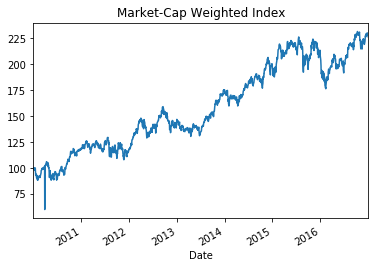

In [540]:
# Aggregating and print the market cap per trading day
raw_index = market_cap_series.sum(axis=1)
print(raw_index)

# Normalizing the aggregate market cap here 
index = raw_index.div(raw_index.iloc[0]).mul(100)
print(index)

# Plotting the index here
index.plot(title='Market-Cap Weighted Index')
plt.show()

Now we have an index to work with!

###### Calculating the contribution of each stock to the index

We have successfully built the value-weighted index. Let's now explore how it performed over the 2010-2016 period.

Let's also determine how much each stock has contributed to the index return.


126.65826661173813
Stock Symbol
WRK     0.011438
PAA     0.020575
LVS     0.041092
GM      0.046371
TEF     0.050559
RIO     0.065207
ABEV    0.081695
GS      0.082251
UPS     0.083492
ABBV    0.094616
ORCL    0.167617
BABA    0.255088
Name: Market Capitalization, dtype: float64


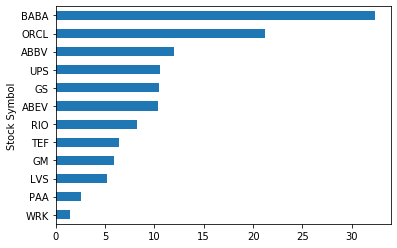

In [517]:
# Calculating and print the index return here
index_return = (index.iloc[-1] / index.iloc[0] - 1) * 100
print(index_return)

# Selecting the market capitalization
market_cap = components['Market Capitalization']

# Calculating the total market cap
total_market_cap = market_cap.sum()

# Calculating the component weights, and print the result
weights = market_cap.div(total_market_cap)
print(weights.sort_values())

# Calculating and plot the contribution by component
weights.mul(index_return).sort_values().plot(kind='barh')
plt.show()

The next step is to take a look at how your index stacks up against a benchmark!

###### Compare index performance against benchmark I

The next step in analyzing the performance of our index is to compare it against a benchmark.

I will use the Dow Jones Industrial Average, which contains the 30 largest stocks, and would also be a reasonable benchmark for the largest stocks from all sectors across the three exchanges.

Index    126.658267
DJIA      86.722172
dtype: float64


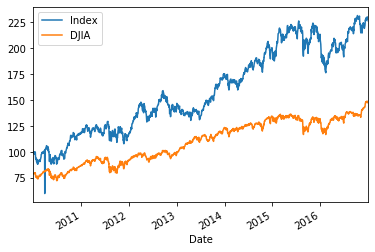

In [527]:
# Convert index series to dataframe here
data = index.to_frame('Index')

# Normalize djia series and add as new column to data
djia = djia.div(djia.iloc[0]).mul(100)
data['DJIA'] = djia

# Show total return for both index and djia
print((data.iloc[-1] / data.iloc[0] - 1) * 100)

# Plot both series
data.plot()
plt.show()

How do they compare?

###### Comparing index performance against benchmark II

The next step in analyzing the performance of our index is to compare it against a benchmark.

Here I will use the S&P 500 as benchmark. We can also use the Dow Jones Industrial Average, which contains the 30 largest stocks, and would also be a reasonable benchmark for the largest stocks from all sectors across the three exchanges.


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 2 columns):
Index    1762 non-null float64
DJIA     1762 non-null float64
dtypes: float64(2)
memory usage: 41.3 KB
None
                 Index       DJIA
Date                             
2010-01-04  100.000000  78.933999
2010-01-05  100.457394  78.844952
2010-01-06   99.981005  78.857332
2010-01-07   99.485328  79.104785
2010-01-08  100.148231  79.189283


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  # Remove the CWD from sys.path while we load stuff.


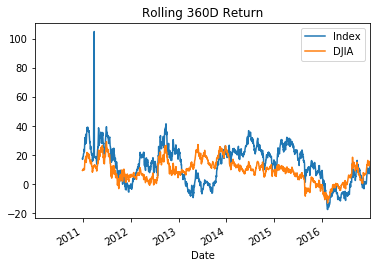

In [519]:
# Inspecting data
print(data.info())
print(data.head())

# Creating multi_period_return function here
def multi_period_return(r):
    return (np.prod(r + 1) - 1) * 100

# Calculating rolling_return_360
rolling_return_360 = data.pct_change().rolling('360D').apply(multi_period_return)

# Plotting rolling_return_360 here
rolling_return_360.plot(title='Rolling 360D Return')
plt.show()

How do the returns of your index compare to the Dow Jones?

###### Visualize your index constituent correlations

To better understand the characteristics of our index constituents, we can calculate the return correlations.

Using the daily stock prices or our index companies, and showing a heatmap of the daily return correlations!


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 12 columns):
AAPL    1761 non-null float64
AMGN    1761 non-null float64
AMZN    1761 non-null float64
CPRT    1761 non-null float64
EL      1762 non-null float64
GS      1762 non-null float64
ILMN    1761 non-null float64
MA      1762 non-null float64
PAA     1762 non-null float64
RIO     1762 non-null float64
TEF     1762 non-null float64
UPS     1762 non-null float64
dtypes: float64(12)
memory usage: 259.0 KB
None
          AAPL      AMGN      AMZN      CPRT        EL        GS      ILMN  \
AAPL  1.000000  0.286898  0.327611  0.346616  0.306770  0.344981  0.264791   
AMGN  0.286898  1.000000  0.323408  0.355892  0.349893  0.390076  0.336927   
AMZN  0.327611  0.323408  1.000000  0.298929  0.334031  0.333402  0.242726   
CPRT  0.346616  0.355892  0.298929  1.000000  0.371763  0.423160  0.265665   
EL    0.306770  0.349893  0.334031  0.371763  1.000000  0.358318  0.214027   

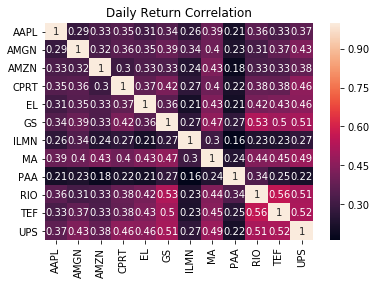

In [521]:
# Inspecting stock_prices here
print(stock_prices.info())

# Calculating the daily returns
returns = stock_prices.pct_change()

# Calculating and print the pairwise correlations
correlations = returns.corr()
print(correlations)


# Plotting a heatmap of daily return correlations
ay = sns.heatmap(correlations, annot=True)
plt.title('Daily Return Correlation')
bottom, top = ay.get_ylim()
ay.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

###### Save your analysis to multiple excel worksheets

Now that you we completed our analysis, we may want to save all results into a single Excel workbook.

Let's practice exporting various DataFrame to multiple Excel worksheets.

In [ ]:
# Inspecting index and stock_prices
print(index.info())
print(stock_prices.info())

# Joining index to stock_prices, and inspect the result
data = stock_prices.join(index)
print(data.info())

# Creating index & stock price returns
returns = data.pct_change()

# Exporting data and data as returns to excel
with pd.ExcelWriter('data.xls') as writer:
    data.to_excel(writer, sheet_name='data')
    returns.to_excel(writer, sheet_name='returns')


### Thanks a lot for your attention. 